In [ ]:
import numpy as np
# Use np.loadtxt() instead when there are non-numeric values as well
dataset = np.genfromtxt('medicalcost-PRICE.csv', delimiter=",", skip_header = True)

In [ ]:
X = dataset[:, :-1]
Y = dataset[:, -1]


In [ ]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [ ]:
# Shuffle the datasets
import random
np.random.shuffle(dataset)

In [ ]:
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)
XVALID = dataset[:index_30percent:, :-1]
YVALID = dataset[:index_30percent:, -1]
XTRAIN = dataset[index_30percent:, :-1]
YTRAIN = dataset[index_30percent:, -1]

401


In [ ]:
XTRAIN = np.asarray(XTRAIN)
YTRAIN = np.asarray(YTRAIN)
XVALID = np.asarray(XVALID)
YVALID = np.asarray(YVALID)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


Model 1 is not accurate.

Epoch 1/24
30/30 [==============================] - 1s 7ms/step - loss: 0.7405 - accuracy: 0.5646 - val_loss: 0.6932 - val_accuracy: 0.6135
Epoch 2/24
30/30 [==============================] - 0s 2ms/step - loss: 0.7198 - accuracy: 0.5742 - val_loss: 0.6721 - val_accuracy: 0.6284
Epoch 3/24
30/30 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.5977 - val_loss: 0.6519 - val_accuracy: 0.6409
Epoch 4/24
30/30 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.6105 - val_loss: 0.6324 - val_accuracy: 0.6584
Epoch 5/24
30/30 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.6222 - val_loss: 0.6137 - val_accuracy: 0.6783
Epoch 6/24
30/30 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.6286 - val_loss: 0.5957 - val_accuracy: 0.6908
Epoch 7/24
30/30 [==============================] - 0s 3ms/step - loss: 0.6290 - accuracy: 0.6371 - val_loss: 0.5792 - val_accuracy: 0.7007
Epoch 8/24
30/30 [==

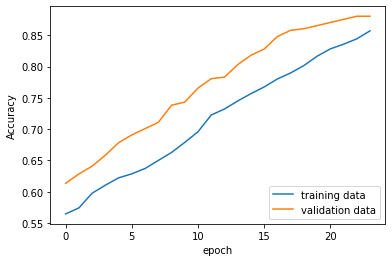

In [ ]:
model1 = Sequential()
model1.add(Dense(1, input_dim = len(X[0, :]), activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

history1 = model1.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), epochs= 24)
# Check what's in the histor


print(history1.params)
#Plot the learning curves (loss/accuracy/MAE)
plt.plot(history1.history['accuracy']) # replace with accuracy/MAE
plt.plot(history1.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/24
30/30 [==============================] - 1s 19ms/step - loss: 5.8527 - accuracy: 0.4600 - val_loss: 5.8881 - val_accuracy: 0.4713
Epoch 2/24
30/30 [==============================] - 0s 4ms/step - loss: 5.6026 - accuracy: 0.4749 - val_loss: 5.6891 - val_accuracy: 0.4988
Epoch 3/24
30/30 [==============================] - 0s 4ms/step - loss: 5.3895 - accuracy: 0.4920 - val_loss: 5.4187 - val_accuracy: 0.4988
Epoch 4/24
30/30 [==============================] - 0s 4ms/step - loss: 5.1759 - accuracy: 0.5027 - val_loss: 5.3803 - val_accuracy: 0.5012
Epoch 5/24
30/30 [==============================] - 0s 4ms/step - loss: 5.1455 - accuracy: 0.5059 - val_loss: 5.3769 - val_accuracy: 0.5012
Epoch 6/24
30/30 [==============================] - 0s 4ms/step - loss: 5.1186 - accuracy: 0.5123 - val_loss: 5.3349 - val_accuracy: 0.5062
Epoch 7/24
30/30 [==============================] - 0s 4ms/step - loss: 5.0838 - accuracy: 0.5091 - val_loss: 5.2952 - val_accuracy: 0.5112
Epoch 8/24
30/30 [=

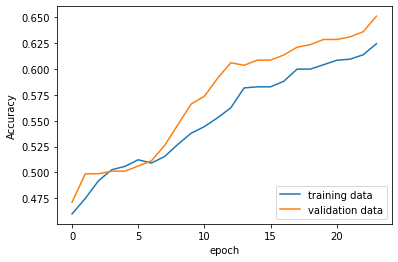

In [ ]:
model2 = Sequential()
model2.add(Dense(2, input_dim = len(X[0, :]), activation='linear'))
model2.add(Dense(1, input_dim = len(X[0, :]), activation='relu'))
model2.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

history2 = model2.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), epochs= 24)
# Check what's in the histor


print(history2.params)
#Plot the learning curves (loss/accuracy/MAE)
plt.plot(history2.history['accuracy']) # replace with accuracy/MAE
plt.plot(history2.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/32
30/30 [==============================] - 0s 5ms/step - loss: 2.1403 - accuracy: 0.8218 - val_loss: 1.5404 - val_accuracy: 0.8703
Epoch 2/32
30/30 [==============================] - 0s 4ms/step - loss: 2.0665 - accuracy: 0.8196 - val_loss: 1.5291 - val_accuracy: 0.8703
Epoch 3/32
30/30 [==============================] - 0s 4ms/step - loss: 2.0110 - accuracy: 0.8175 - val_loss: 1.5060 - val_accuracy: 0.8728
Epoch 4/32
30/30 [==============================] - 0s 3ms/step - loss: 1.9929 - accuracy: 0.8175 - val_loss: 1.4702 - val_accuracy: 0.8678
Epoch 5/32
30/30 [==============================] - 0s 2ms/step - loss: 1.9246 - accuracy: 0.8186 - val_loss: 1.4637 - val_accuracy: 0.8678
Epoch 6/32
30/30 [==============================] - 0s 3ms/step - loss: 1.8517 - accuracy: 0.8207 - val_loss: 1.4616 - val_accuracy: 0.8678
Epoch 7/32
30/30 [==============================] - 0s 2ms/step - loss: 1.8411 - accuracy: 0.8207 - val_loss: 1.4585 - val_accuracy: 0.8678
Epoch 8/32
30/30 [==

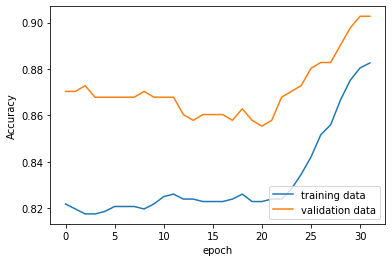

In [ ]:
model3 = Sequential()
model3.add(Dense(9, input_dim = len(X[0, :]), activation='relu'))

model3.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

history3 = model1.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), epochs= 32)
# Check what's in the histor


print(history3.params)
#Plot the learning curves (loss/accuracy/MAE)
plt.plot(history3.history['accuracy']) # replace with accuracy/MAE
plt.plot(history3.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/32
30/30 [==============================] - 0s 5ms/step - loss: 0.7356 - accuracy: 0.8858 - val_loss: 0.5511 - val_accuracy: 0.9027
Epoch 2/32
30/30 [==============================] - 0s 3ms/step - loss: 0.7211 - accuracy: 0.8879 - val_loss: 0.5492 - val_accuracy: 0.9127
Epoch 3/32
30/30 [==============================] - 0s 3ms/step - loss: 0.7202 - accuracy: 0.8911 - val_loss: 0.5483 - val_accuracy: 0.9102
Epoch 4/32
30/30 [==============================] - 0s 3ms/step - loss: 0.7298 - accuracy: 0.8922 - val_loss: 0.5460 - val_accuracy: 0.9152
Epoch 5/32
30/30 [==============================] - 0s 2ms/step - loss: 0.7273 - accuracy: 0.8933 - val_loss: 0.5435 - val_accuracy: 0.9202
Epoch 6/32
30/30 [==============================] - 0s 2ms/step - loss: 0.7363 - accuracy: 0.9007 - val_loss: 0.5404 - val_accuracy: 0.9227
Epoch 7/32
30/30 [==============================] - 0s 3ms/step - loss: 0.7334 - accuracy: 0.9007 - val_loss: 0.5387 - val_accuracy: 0.9302
Epoch 8/32
30/30 [==

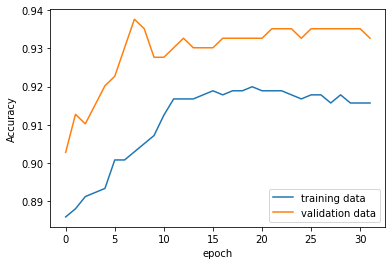

In [ ]:
#model 4
model4 = Sequential()
model4.add(Dense(16, input_dim = 2, activation='linear'))
model4.add(Dense(8, input_dim = 2, activation='relu'))
model4.add(Dense(4, activation='relu'))
model4.add(Dense(1, activation='relu'))

model4.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

history4 = model1.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), epochs= 32)
# Check what's in the histor


print(history4.params)
#Plot the learning curves (loss/accuracy/MAE)
plt.plot(history4.history['accuracy']) # replace with accuracy/MAE
plt.plot(history4.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/24
30/30 [==============================] - 1s 10ms/step - loss: 2.5909 - accuracy: 0.6233 - val_loss: 1.9909 - val_accuracy: 0.6534
Epoch 2/24
30/30 [==============================] - 0s 4ms/step - loss: 1.6408 - accuracy: 0.6233 - val_loss: 1.4132 - val_accuracy: 0.6559
Epoch 3/24
30/30 [==============================] - 0s 4ms/step - loss: 1.1683 - accuracy: 0.6243 - val_loss: 1.0918 - val_accuracy: 0.6559
Epoch 4/24
30/30 [==============================] - 0s 4ms/step - loss: 0.8559 - accuracy: 0.6339 - val_loss: 0.8088 - val_accuracy: 0.6708
Epoch 5/24
30/30 [==============================] - 0s 3ms/step - loss: 0.7252 - accuracy: 0.6596 - val_loss: 0.7359 - val_accuracy: 0.6733
Epoch 6/24
30/30 [==============================] - 0s 4ms/step - loss: 0.6455 - accuracy: 0.6980 - val_loss: 0.6559 - val_accuracy: 0.7357
Epoch 7/24
30/30 [==============================] - 0s 4ms/step - loss: 0.5769 - accuracy: 0.7652 - val_loss: 0.6423 - val_accuracy: 0.8279
Epoch 8/24
30/30 [=

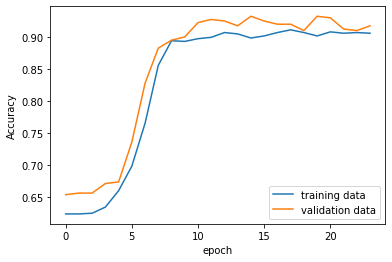

In [ ]:
#model 5
model5 = Sequential()
model5.add(Dense(16, input_dim = len(X[0, :]), activation='linear'))
model5.add(Dense(8, input_dim = len(X[0, :]), activation='relu'))
model5.add(Dense(4, activation='relu'))
model5.add(Dense(1, activation='relu'))
model5.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
#model.fit(XTRAIN, YTRAIN, epochs = 256, verbose = 1)
# Do the training (specify the validation set as well)
history5 = model5.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), epochs= 24)
# Check what's in the histor


print(history5.params)
#Plot the learning curves (loss/accuracy/MAE)
plt.plot(history5.history['accuracy']) # replace with accuracy/MAE
plt.plot(history5.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

Epoch 1/128
30/30 [==============================] - 1s 11ms/step - loss: 0.7951 - accuracy: 0.6542 - val_loss: 0.5316 - val_accuracy: 0.7357
Epoch 2/128
30/30 [==============================] - 0s 4ms/step - loss: 0.4795 - accuracy: 0.7876 - val_loss: 0.4025 - val_accuracy: 0.8603
Epoch 3/128
30/30 [==============================] - 0s 4ms/step - loss: 0.3840 - accuracy: 0.8517 - val_loss: 0.3319 - val_accuracy: 0.8878
Epoch 4/128
30/30 [==============================] - 0s 6ms/step - loss: 0.3392 - accuracy: 0.8623 - val_loss: 0.2980 - val_accuracy: 0.9102
Epoch 5/128
30/30 [==============================] - 0s 4ms/step - loss: 0.3241 - accuracy: 0.8762 - val_loss: 0.2794 - val_accuracy: 0.9077
Epoch 6/128
30/30 [==============================] - 0s 4ms/step - loss: 0.3200 - accuracy: 0.8805 - val_loss: 0.2710 - val_accuracy: 0.9127
Epoch 7/128
30/30 [==============================] - 0s 4ms/step - loss: 0.3115 - accuracy: 0.8847 - val_loss: 0.2645 - val_accuracy: 0.9152
Epoch 8/128


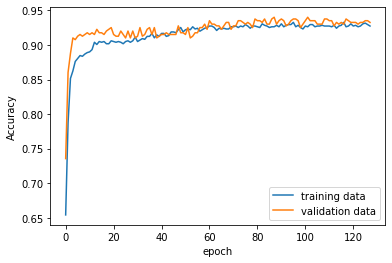

In [ ]:
#model 6
model6 = Sequential()
model6.add(Dense(16, input_dim = len(X[0, :]), activation='linear'))
model6.add(Dense(8, input_dim = len(X[0, :]), activation='relu'))
model6.add(Dense(4, activation='relu'))
model6.add(Dense(1, activation='relu'))
model6.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
#model.fit(XTRAIN, YTRAIN, epochs = 256, verbose = 1)
# Do the training (specify the validation set as well)
history6 = model6.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), epochs= 128)
# Check what's in the histor


print(history6.params)
#Plot the learning curves (loss/accuracy/MAE)
plt.plot(history6.history['accuracy']) # replace with accuracy/MAE
plt.plot(history6.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
jupyter nbconvert --to html //content/Phase_3.ipynb

SyntaxError: ignored